Check Python version

In [42]:
!python --version

Python 3.10.13


Import libraries

In [43]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Extract Data**

In [44]:
# Through online GitHub
file_name = 'https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/air_passengers.csv'

In [45]:
train_df = pd.read_csv(file_name)

In [46]:
train_df.shape

(144, 2)

In [47]:
train_df.columns

Index(['ds', 'y'], dtype='object')

In [48]:
train_df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [49]:
train_df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


Define the required time and target columns

In [50]:
time_col = train_df.columns[0]
target_col = train_df.columns[-1]
train_df[time_col] = train_df[time_col].astype(str)

Change target column to float

In [51]:
train_df[target_col] = train_df[target_col].astype(float)

In [52]:
train_df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


Plot graph

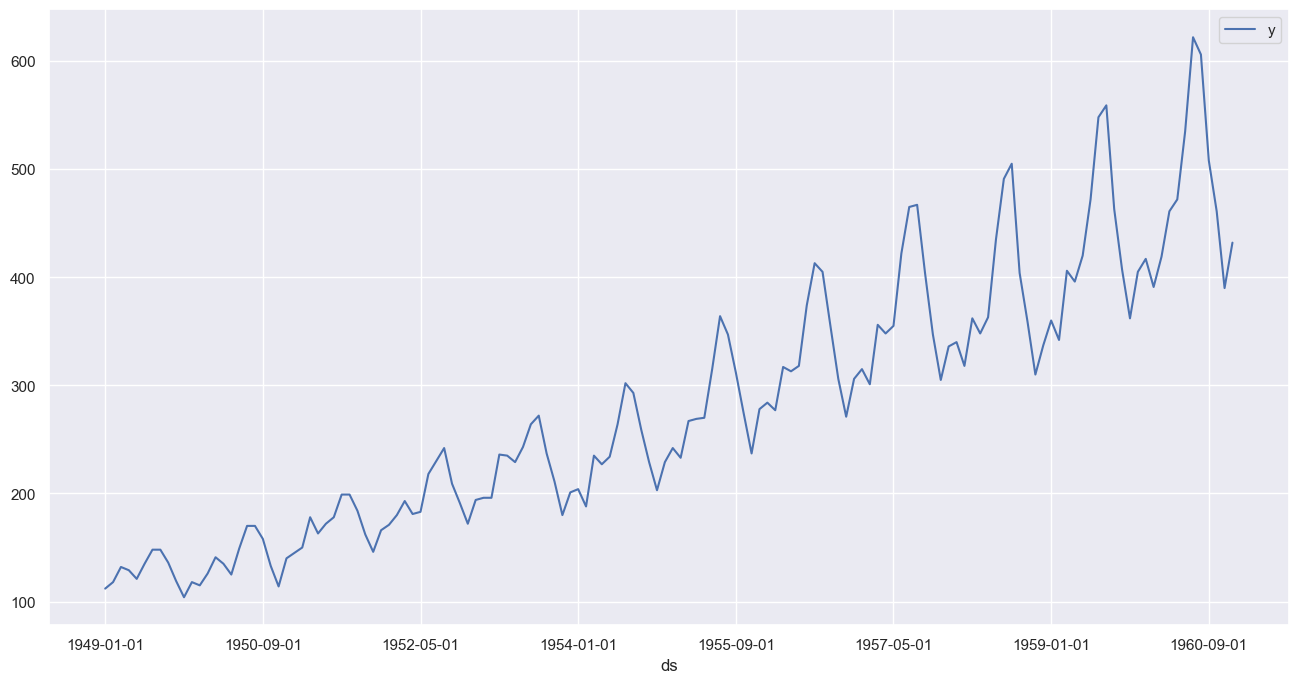

In [53]:
figsize = (16, 8)
train_df.set_index(time_col).plot(figsize=figsize);

### **Train API**

Train data: convert df to list-of-list

In [54]:
train_data = []

In [55]:
for value in train_df.values:
    train_data.append(list(value))

In [56]:
train_data[:10]

[['1949-01-01', 112.0],
 ['1949-02-01', 118.0],
 ['1949-03-01', 132.0],
 ['1949-04-01', 129.0],
 ['1949-05-01', 121.0],
 ['1949-06-01', 135.0],
 ['1949-07-01', 148.0],
 ['1949-08-01', 148.0],
 ['1949-09-01', 136.0],
 ['1949-10-01', 119.0]]

Define Model Request (optional)

In [57]:
# # Default model request
# model_request = {
#     'type': 'meta_lr',  # 'meta_wa'
#     'scorers': ['smape', 'mape'],
#     'params': {
#         'preprocessors': [
#             {'type': 'dartsimputer', 'params': {'strategy': 'mean'}},
#             # {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
#             {'type': 'minmaxscaler'},
#         ],
#         'base_models': [
#             # {'type': 'darts_rnn'},
#             {'type': 'darts_lightgbm'},
#             {'type': 'darts_autotheta'},
#             {'type': 'darts_autoarima'},
#             {'type': 'darts_autoets'},
#             # {'type': 'stats_autotheta'},
#             # {'type': 'stats_autoarima'},
#             # {'type': 'stats_autoets'},
#         ],
#     },
# }

# Customized model request
# model_request = {
#     'type': 'meta_wa',
#     'scorers': ['smape', 'mape'],
#     'params': {
#         'base_models': [
#             {'type': 'darts_autoarima'},
#             {'type': 'darts_autotheta'},
#             {'type': 'darts_autoets'},
#             {'type': 'stats_autotheta'},
#         ],
#     },
# }
# Customized model request
model_request = {
    'type': 'meta_wa',
    'scorers': ['smape', 'mape'],
    'params': {
        'base_models': [
            {'type': 'darts_tbats'},
            # {'type': 'darts_autoarima'},
            # {'type': 'darts_autotheta'},
            # {'type': 'darts_autoets'},
            # {'type': 'stats_autotheta'},
            # {'type': 'darts_naive'},
            # {'type': 'darts_seasonalnaive'},
            # {'type': 'darts_linearmodel'},
        ],
    },
}

Train API JSON Payload

In [58]:
api_json = {
    'data': train_data,
    'model': model_request  # (optional) can be commented out
}

Build URL

In [59]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [60]:
# URL to our SYBIL AWS service
protocol = url_dict['protocol']
host = url_dict['host']
port = url_dict['port']
endpoint = 'train'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

In [61]:
# protocol, host, port

Call endpoint, receive response JSON, write to output file

In [22]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: total: 0 ns
Wall time: 3min 11s


In [23]:
train_json_out = response.json()  # dict output
train_json_out

{'model': 'AgEBCOk6AADoOgAA3TMAABgAAADYMwAAXQcAAIAAZWxpk4xvlGxvjG2UBGFplE1hgWlhaWGMjC5hC2WBYWwMYSmMbW9uXwWUD2eULmltlChfaWFhZHlBKQeUeG9hbmGBX4VhYWmUc2eUlHlhaWRzX2WUZWWME19yX2lBa3BveWlhcriUlJSJBEr/AktiLmyUbpNhS4eQOChK/wJLYgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHRmlJSMlAZOZIZwOmhoKGQuLl9lBZRohwE4KE7/YmF1V4dbS2J1YwhzE2NlYWVOZH1SlGWUhQDN19/p8vwFDhghKjQ9R09ZYmx1foiRm6Stt7/J0tzl7vgBCxQdJzA5QkxVX2hxe4SOl6CpsrzFz9jh6/T+BxAZIiw1P0hRW2Rud4CJk5ylr7jBy9Te5/D6AwwWHykyO0VOWGBqc3yGj5miq7W+yNDa4+z2/wkSGyUuOEBKU11mb3mCi5WeqLG6w83W4Ony/AUoZHMulEJLBn1vYlJoZGhoKJRLUpRhdYFiZXI4YpQvcGhoAZSJA/9LBACAgCBA4ICAAMAAgMCAoOBAoEBAwKCAgCDAQGCAQODgAEBAwGCAIKDgQMBAIOCAQICAgGCgYIAAoGCAIICAYGBAgOBQMKBgoEAgsNDgsMCwgCCgYMBQ0JDgYNBQMCDwILDQQMAwYBAwQLAQAEDgoMCwMLCQQHBgEIBgYMBAgCB48HCgUBBwMNCAuHDwwNBgAH1hYU5yfpRlaF9liGaUX2VuX2xtlHNpaXV2c2hwdGFfc2kZX2Nlc3JpHGVpaRlfY2VzaWkLbF9hY

### **Forecast API**

Forecast Dates: predict the next 2 years of air passenger data (1961-1962)

In [24]:
dates = [
    '1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01', '1961-05-01', '1961-06-01',
    '1961-07-01', '1961-08-01', '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
    '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01', '1962-05-01', '1962-06-01',
    '1962-07-01', '1962-08-01', '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
]

Model from Train API

In [25]:
model = train_json_out['model']

Forecast API JSON Payload

In [26]:
api_json = {
    'model': model,
    'data': dates
}

Build URL (same as train except for the endpoint)

In [27]:
endpoint = 'forecast'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [28]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: total: 0 ns
Wall time: 2.04 s


In [29]:
forecast_json_out = response.json()  # dict output
forecast_json_out

{'data': [['1960-12-31T00:00:00', 448.29856016747055],
  ['1961-01-30T00:00:00', 439.4221505151578],
  ['1961-03-01T00:00:00', 507.7346502816566],
  ['1961-03-31T00:00:00', 493.0375167082078],
  ['1961-04-30T00:00:00', 498.8588537396562],
  ['1961-05-30T00:00:00', 564.6487189730683],
  ['1961-06-29T00:00:00', 635.2991195271716],
  ['1961-07-29T00:00:00', 630.4127404053119],
  ['1961-08-28T00:00:00', 553.0946829207871],
  ['1961-09-27T00:00:00', 482.4049220288753],
  ['1961-10-27T00:00:00', 423.5596859874792],
  ['1961-11-26T00:00:00', 475.2360186872633],
  ['1961-12-26T00:00:00', 490.6723810031167],
  ['1962-01-25T00:00:00', 480.9569604199404],
  ['1962-02-24T00:00:00', 555.7264553301653],
  ['1962-03-26T00:00:00', 539.6401276789879],
  ['1962-04-25T00:00:00', 546.0117058093646],
  ['1962-05-25T00:00:00', 618.0201231638458],
  ['1962-06-24T00:00:00', 695.3485005865967],
  ['1962-07-24T00:00:00', 690.0002539241245],
  ['1962-08-23T00:00:00', 605.3739831051981],
  ['1962-09-22T00:00:00',

Combine forecast dates and output

In [30]:
forecast_df = pd.DataFrame(
    data=forecast_json_out['data'],
    columns=[time_col, target_col],
)

In [31]:
forecast_df.shape

(24, 2)

In [32]:
forecast_df.columns

Index(['ds', 'y'], dtype='object')

In [33]:
forecast_df.head()

,ds,y
0,1960-12-31T00:00:00,448.298560
1,1961-01-30T00:00:00,439.422151
2,1961-03-01T00:00:00,507.734650
3,1961-03-31T00:00:00,493.037517
4,1961-04-30T00:00:00,498.858854


In [34]:
forecast_df.tail()

,ds,y
19,1962-07-24T00:00:00,690.000254
20,1962-08-23T00:00:00,605.373983
21,1962-09-22T00:00:00,528.002525
22,1962-10-22T00:00:00,463.595153
23,1962-11-21T00:00:00,520.156007


Plot train and forecast side-by-side

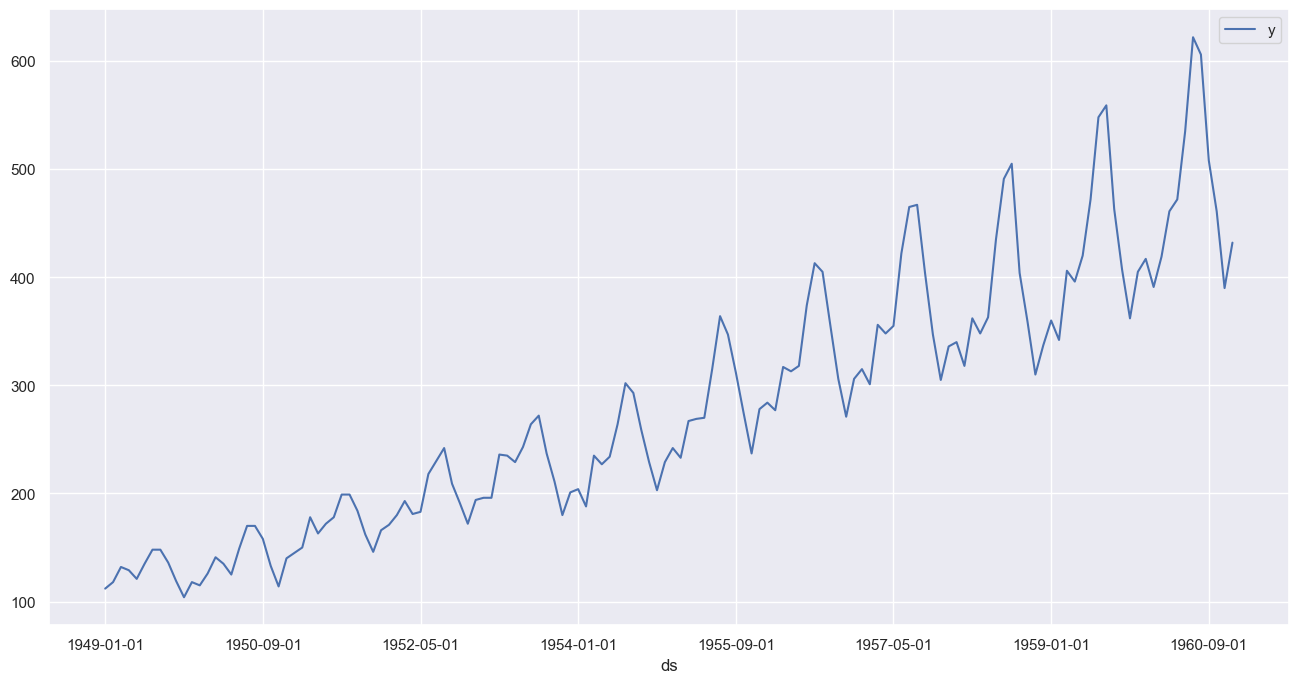

In [35]:
train_df['color'] = 'b'
train_df.set_index(time_col).plot(figsize=figsize, color=train_df['color']);

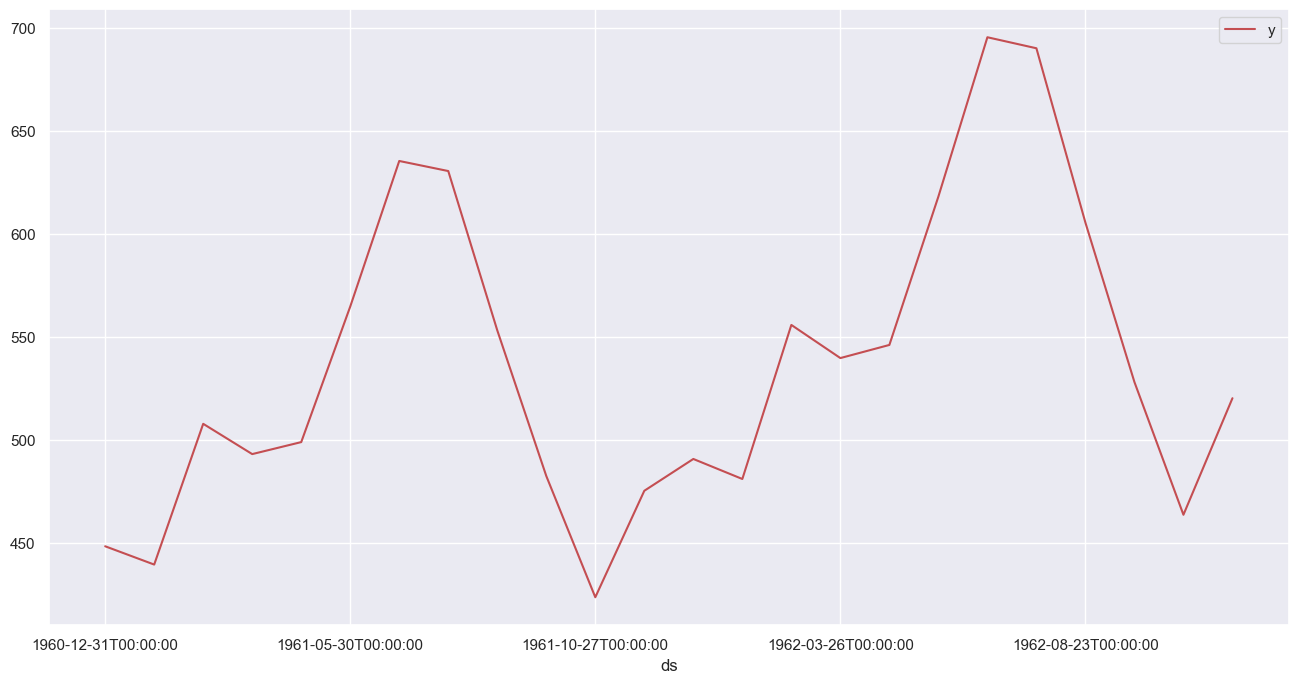

In [36]:
forecast_df['color'] = 'r'
forecast_df.set_index(time_col).plot(figsize=figsize, color=forecast_df['color']);

Combine train and forecast sets

In [37]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [38]:
df.shape

(168, 3)

In [39]:
df.head()

,ds,y,color
0,1949-01-01,112.0,b
1,1949-02-01,118.0,b
2,1949-03-01,132.0,b
3,1949-04-01,129.0,b
4,1949-05-01,121.0,b


In [40]:
df.tail()

,ds,y,color
163,1962-07-24T00:00:00,690.000254,r
164,1962-08-23T00:00:00,605.373983,r
165,1962-09-22T00:00:00,528.002525,r
166,1962-10-22T00:00:00,463.595153,r
167,1962-11-21T00:00:00,520.156007,r


Plot combined train and forecast sets with the vertical black line as the cut-off

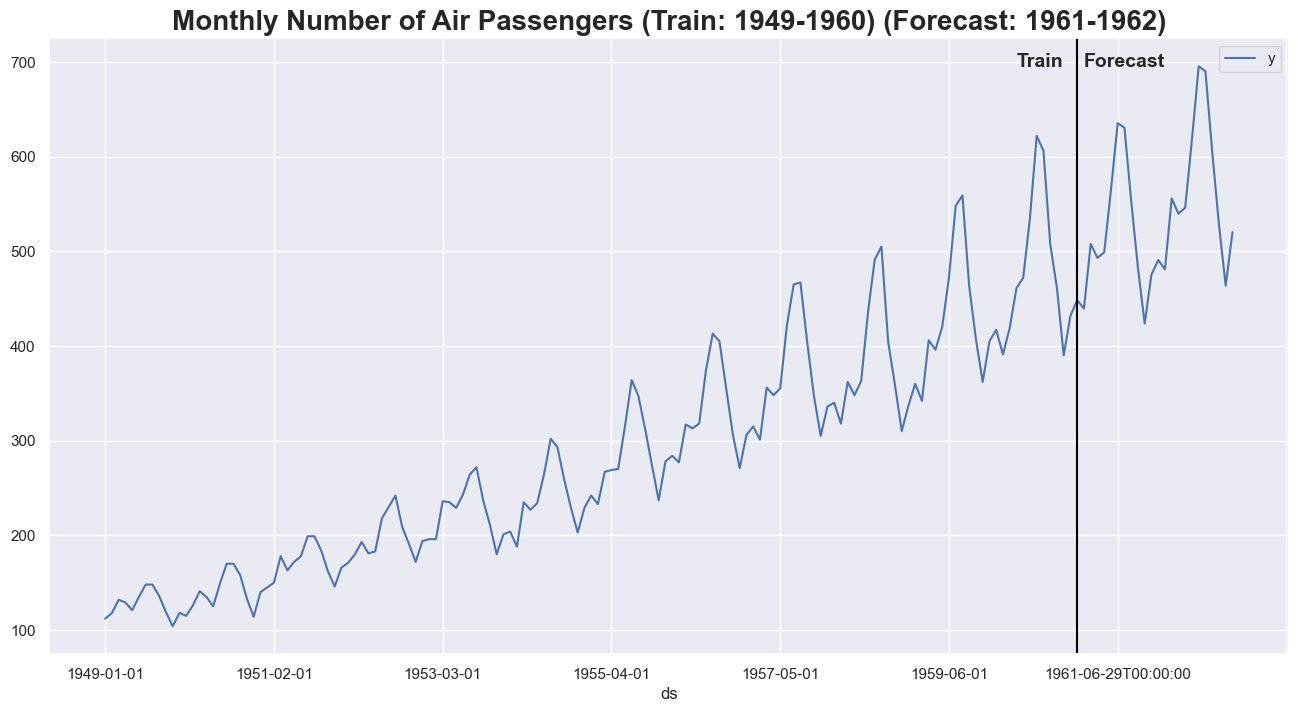

In [41]:
df.set_index(time_col).plot(figsize=figsize, color=df['color'])
plt.axvline(x=len(train_df), color='black', label='Train/Forecast set cut-off')
plt.text(x=len(train_df)-9, y=forecast_df[target_col].max(), s='Train', fontweight='bold', fontsize=14)
plt.text(x=len(train_df)+1, y=forecast_df[target_col].max(), s='Forecast', fontweight='bold', fontsize=14)
plt.title(label='Monthly Number of Air Passengers (Train: 1949-1960) (Forecast: 1961-1962)', fontweight='bold', fontsize=20)
plt.show();

In [62]:
print(train_data[-1] , forecast_df.head(1))

['1960-12-01', 432.0]                     ds          y color
0  1960-12-31T00:00:00  448.29856     r
